# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
df.shape

(4324, 9)

We have 4324 rows and 9 columns.

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

The columns are 'Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price' y 'Mission_Status', where we can assume the first 2 columns are junk data.

In [9]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [10]:
df.duplicated().sum()

0

We can observe that there are no problems with duplicated row and null values, except for the 'Price' column. Let's solve it.

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [11]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


We remove the useless columns.


In [12]:
mask = pd.to_datetime(df['Date'], format='%a %b %d, %Y', errors='coerce').notna()

df.loc[mask, 'Date'] = pd.to_datetime(df.loc[mask, 'Date'], utc=True)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce',utc=True)

We convert the 'Date' column into datatime elements.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    object             
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 236.6+ KB


In [14]:
df['Year'] = df['Date'].dt.year

In [15]:
df['Price'] = df['Price'].apply(lambda x:str(x).replace(',','')).astype('float64') # convert to float
df['Price'].isna().sum() # the number of nan values persists

3360

## Descriptive Statistics

In [16]:
df.describe()

,Price,Year
count,964.00,"4,324.00"
mean,153.79,"1,987.39"
std,288.45,18.07
min,5.30,"1,957.00"
25%,40.00,"1,972.00"
50%,62.00,"1,984.00"
75%,164.00,"2,002.00"
max,"5,000.00","2,020.00"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   Year            4324 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(5)
memory usage: 253.5+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
counts = df['Organisation'].value_counts()
counts

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

In [19]:
bar = px.bar(x = counts.index,
             y = counts,
             title='Organisation Sum',
             color_continuous_scale='Agsunset')

bar.update_layout(xaxis_title='Organisations',
yaxis_title='Number of Launches',
coloraxis_showscale=False)

bar.show()

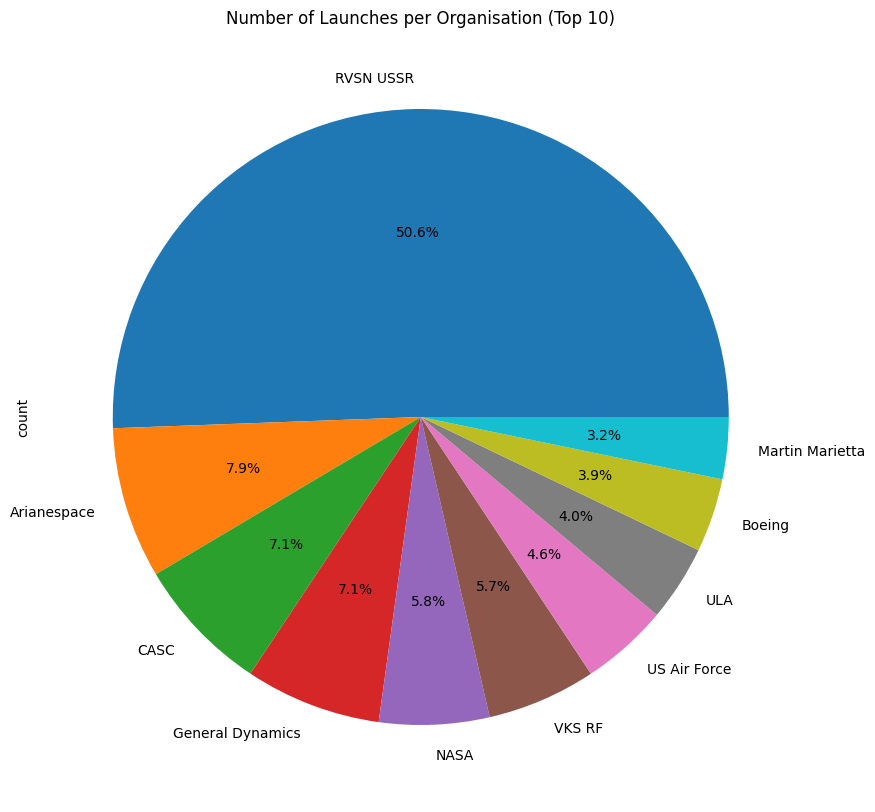

In [20]:
counts[:10].plot(
    kind='pie',
    title='Number of Launches per Organisation (Top 10)',
    figsize=(10,10),
    autopct='%1.1f%%'
)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [21]:
df['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [22]:
bar = px.bar(x = df['Rocket_Status'].unique(),
             y = df['Rocket_Status'].value_counts(),
             title='Number of Active versus Retired Rockets',
             color_continuous_scale='Agsunset')

bar.update_layout(xaxis_title='Active vs Retired',
yaxis_title='Number of Rockets',
coloraxis_showscale=False,
width=600,
height=400)

bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [23]:
df.groupby('Mission_Status')['Mission_Status'].count()

Mission_Status
Failure               339
Partial Failure       102
Prelaunch Failure       4
Success              3879
Name: Mission_Status, dtype: int64

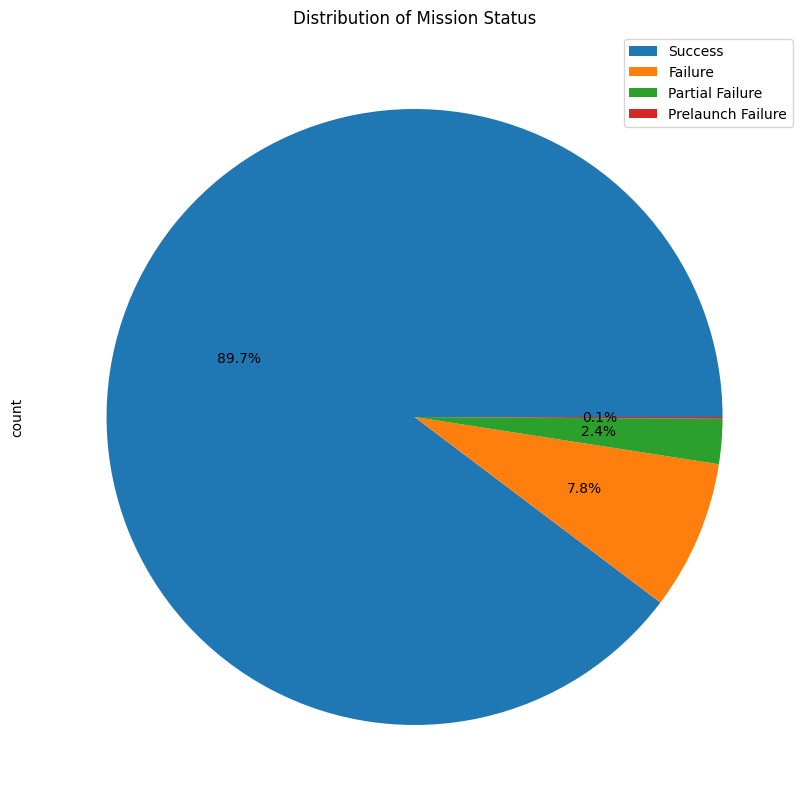

In [24]:
df['Mission_Status'].value_counts().plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    title = 'Distribution of Mission Status',
    labels=None
)

plt.legend(labels=df['Mission_Status'].value_counts().index)
plt.show()

In [25]:
print(f"The number of failures are: {df.groupby('Mission_Status')['Mission_Status'].count().Failure + df.groupby('Mission_Status')['Mission_Status'].count()['Partial Failure'] + df.groupby('Mission_Status')['Mission_Status'].count()['Prelaunch Failure']}")
print(f"The number of successes are: {df.groupby('Mission_Status')['Mission_Status'].count().Success}")

The number of failures are: 445
The number of successes are: 3879


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [26]:
histogram = px.bar(x=df['Year'], y=df['Price'], 
                   title="Distribution of the Mission's Expenses (in USD millions)", 
                   color_continuous_scale='Agsunset')

histogram.update_layout(xaxis_title='Years',
yaxis_title='Expense',
coloraxis_showscale=False)

histogram.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [27]:
pattern = r',\s*([^,]+)$'

df['Countries'] = df['Location'].str.extract(pattern, expand=False)
df['Countries'].value_counts()

Countries
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: count, dtype: int64

In [28]:
# Replace some locations with its countries according to the current ISO3166
df['Countries'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    },
    inplace=True
)
df['Countries'] = df['Countries'].apply(lambda x: countries.get(x).alpha3)
df['Countries'].value_counts()

Countries
RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: count, dtype: int64

In [29]:
import pycountry

df_countries = pd.DataFrame({'Value' : df['Countries'].value_counts()})
df_countries = df_countries.reset_index()
df_countries

,Countries,Value
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
7,KIR,36
8,IRN,14
9,NZL,13


In [30]:
world_map = px.choropleth(df_countries,
                          locations=df_countries['Countries'],
                          color=df_countries['Value'], 
                          hover_name=df_countries['Countries'], 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [31]:
df_failures = pd.DataFrame({'Value' : df['Countries'][df['Mission_Status'] == 'Failure'].value_counts()})
df_failures = df_failures.reset_index()
df_failures

,Countries,Value
0,USA,129
1,KAZ,72
2,RUS,63
3,CHN,19
4,FRA,13
5,JPN,10
6,IRN,8
7,IND,8
8,KIR,3
9,PRK,3


In [32]:
world_map = px.choropleth(df_failures,
                          locations=df_failures['Countries'],
                          color=df_failures['Value'], 
                          hover_name=df_failures['Countries'], 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [33]:
df_sunburst = df.groupby(by=['Countries', 
                             'Organisation',
                             'Mission_Status'], as_index=False).agg({'Date': pd.Series.count})

df_sunburst = df_sunburst.sort_values('Date', ascending=False)
df_sunburst

,Countries,Organisation,Mission_Status,Date
83,RUS,RVSN USSR,Success,1119
58,KAZ,RVSN USSR,Success,495
19,FRA,Arianespace,Success,267
9,CHN,CASC,Success,231
105,USA,General Dynamics,Success,203
...,...,...,...,...
77,RUS,Khrunichev,Success,1
79,RUS,MITT,Failure,1
84,RUS,Roscosmos,Failure,1
86,RUS,SRC,Failure,1


In [34]:
burst = px.sunburst(df_sunburst, 
                    path=['Countries',
                          'Organisation',
                          'Mission_Status'], 
                    values='Date'
                   )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [35]:
df['Year'] = df['Date']
for row in df.index:
    df['Year'][row] = df['Date'][row].year

C:\Users\carlo\AppData\Local\Temp\ipykernel_14820\143012347.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\carlo\AppData\Local\Temp\ipykernel_14820\143012347.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2020' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.



In [36]:
money_by_organization = df.groupby('Organisation')['Price'].sum()
money_by_organization = money_by_organization[money_by_organization!=0]
money_by_organization

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

In [37]:
bar = px.bar(x = money_by_organization.index, # index = category name
             y = money_by_organization, # count
             title='Organisations Expenses in Total (in USD millions)',
             color_continuous_scale='Agsunset')

bar.update_layout(xaxis_title='Organisations',
yaxis_title='Expenses',
coloraxis_showscale=False)

bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [38]:
avg_money_per_launch = df.groupby('Organisation')['Price'].mean()
avg_money_per_launch = avg_money_per_launch.dropna()
avg_money_per_launch

Organisation
Arianespace         170.26
Boeing              177.29
CASC                 40.13
EER                  20.00
ESA                  37.00
Eurockot             41.80
ExPace               28.30
ILS                 101.54
ISRO                 32.49
JAXA                 56.00
Kosmotras            29.00
Lockheed             35.00
MHI                  95.47
Martin Marietta      80.16
NASA                511.95
Northrop             47.35
RVSN USSR         5,000.00
Rocket Lab            7.50
Roscosmos            51.63
Sandia               15.00
SpaceX               54.99
ULA                 151.00
US Air Force         59.65
VKS RF               46.94
Virgin Orbit         12.00
Name: Price, dtype: float64

In [39]:
bar = px.bar(x = avg_money_per_launch.index,
             y = avg_money_per_launch,
             title='Organisations Expenses per Launch (in USD millions)',
             color_continuous_scale='Agsunset')

bar.update_layout(xaxis_title='Organisations',
yaxis_title='Expenses',
coloraxis_showscale=False)

bar.show()

# Chart the Number of Launches per Year

In [40]:
launches_per_year = df.groupby('Year')['Detail'].count()[:-1] #We eliminate the last one because the data is from middle of 2020
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2015     52
2016     90
2017     92
2018    117
2019    109
Name: Detail, Length: 63, dtype: int64

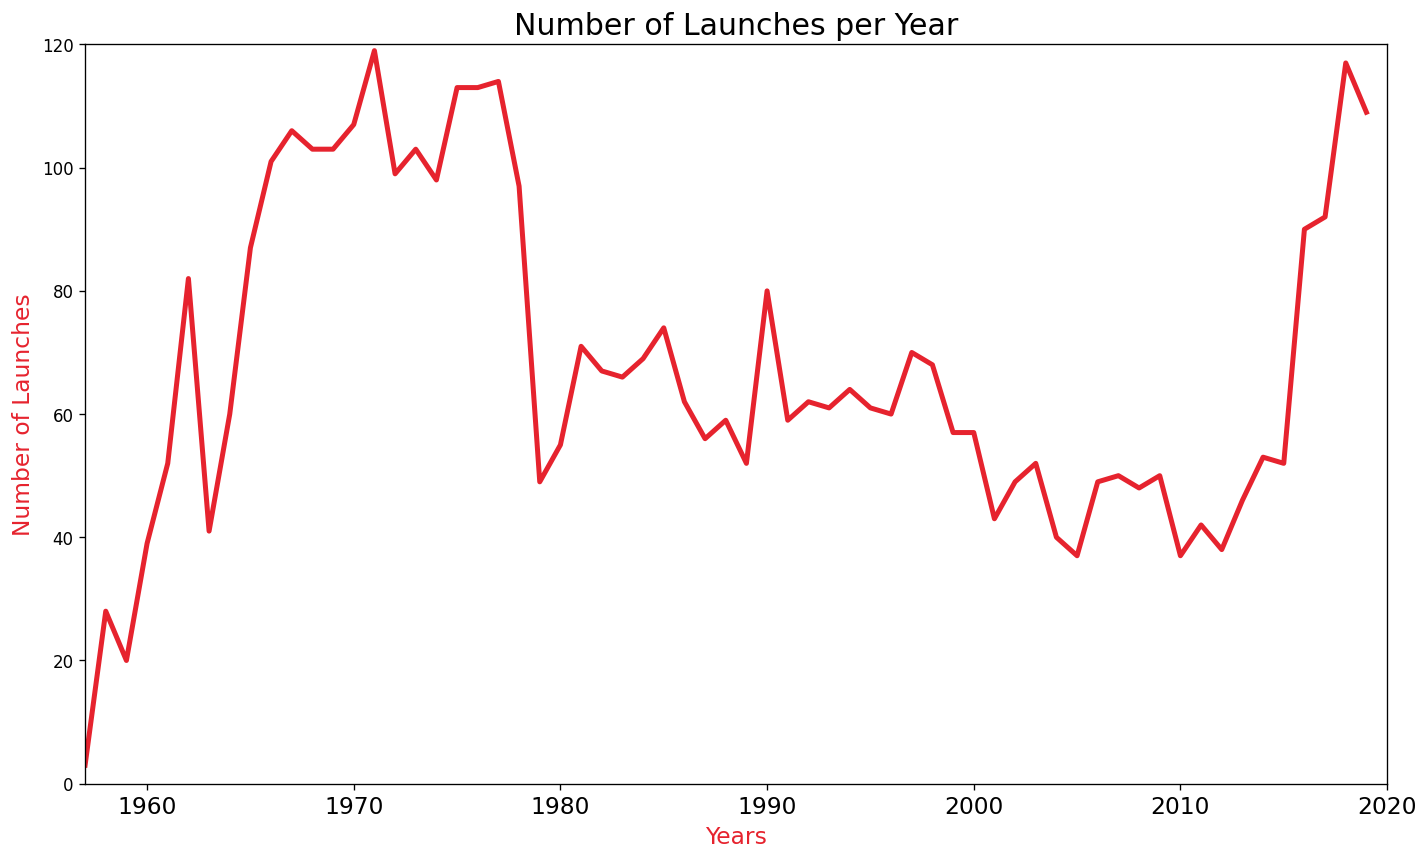

In [41]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Number of Launches per Year', fontsize=18)

plt.xticks(fontsize=14)

ax1 = plt.gca()

ax1.set_ylabel('Number of Launches', color='#E6232E', fontsize=14)
ax1.set_xlabel('Years', color='#E6232E', fontsize=14)

ax1.set_ylim([0, 120])
ax1.set_xlim([df['Year'].min(), df['Year'].max()])

ax1.plot(launches_per_year.index, launches_per_year, color='#E6232E', linewidth=3)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [42]:
df['Month'] = df['Date'].dt.month
result = df.groupby(['Year', 'Month']).size().idxmax()
result

(1971, 12)

The month who had a higher number of launches was December of 1971

In [86]:
launches_per_month = df.groupby('Month')['Detail'].count()
launches_per_month

Month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Detail, dtype: int64

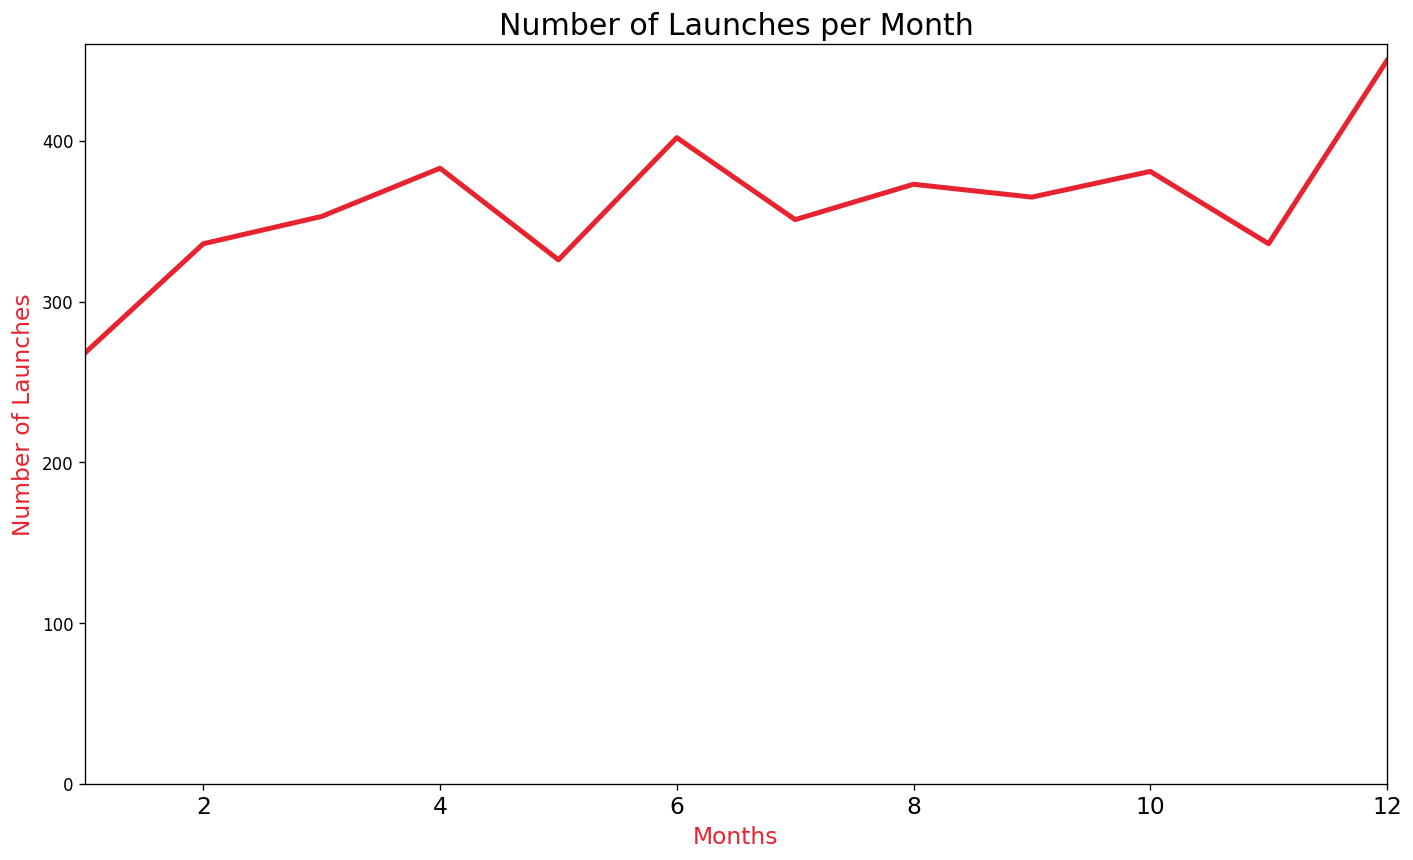

In [84]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Number of Launches per Month', fontsize=18)
plt.xticks(fontsize=14)

ax1 = plt.gca()

ax1.set_ylabel('Number of Launches', color='#E6232E', fontsize=14)
ax1.set_xlabel('Months', color='#E6232E', fontsize=14)

ax1.set_ylim([0, launches_per_month.max()+10])
ax1.set_xlim([launches_per_month.index.min(), launches_per_month.index.max()])

ax1.plot(launches_per_month.index, launches_per_month, color='#E6232E', linewidth=3)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [45]:
df_months = pd.DataFrame({'Value': df['Month'].value_counts()})
df_months = df_months.reset_index()
df_months = df_months.sort_values(by='Month')
df_months

,Month,Value
11,1,268
8,2,336
6,3,353
2,4,383
10,5,326
1,6,402
7,7,351
4,8,373
5,9,365
3,10,381


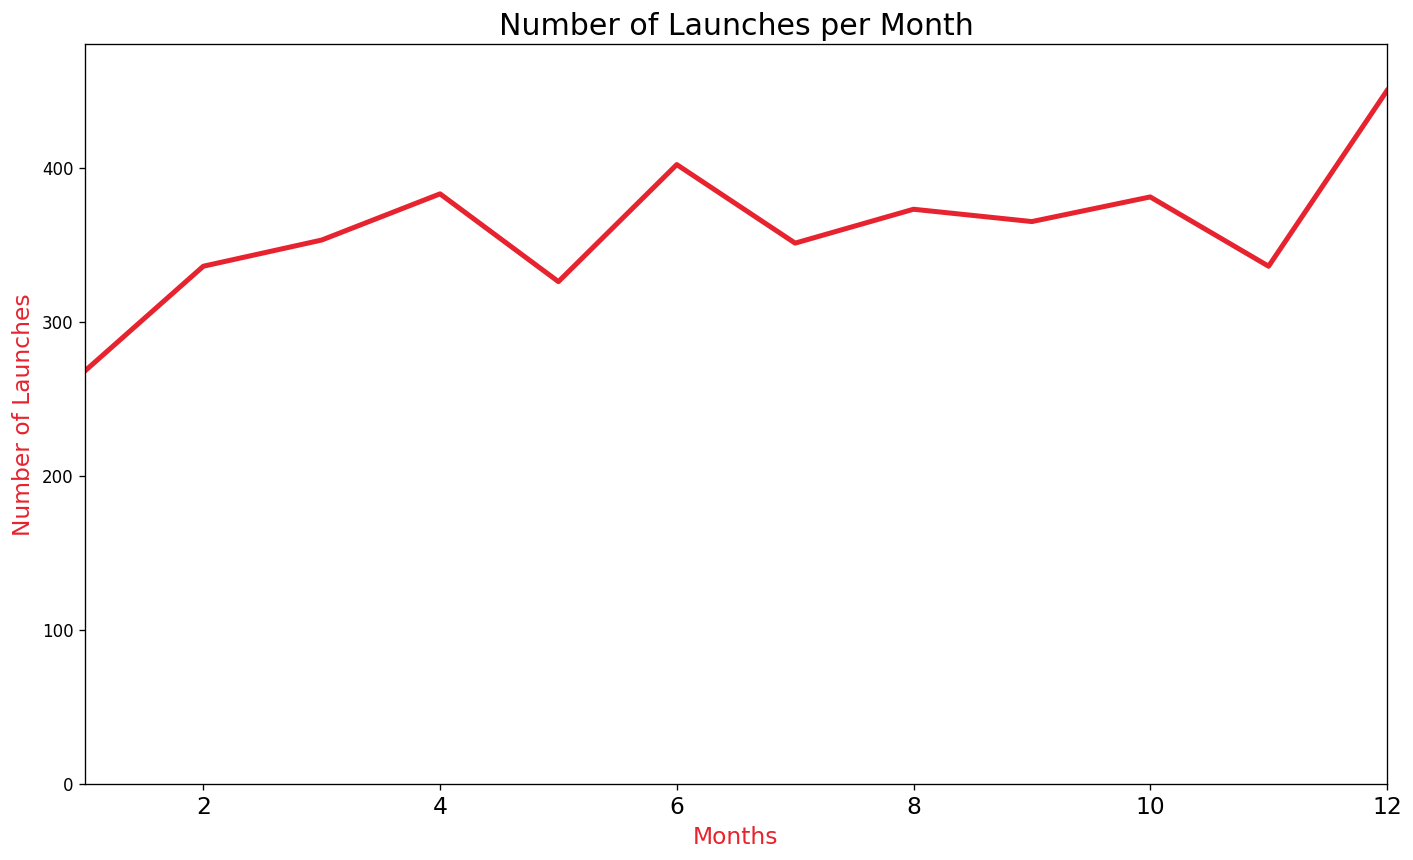

In [46]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Number of Launches per Month', fontsize=18)

plt.xticks(fontsize=14)

ax1 = plt.gca()

ax1.set_ylabel('Number of Launches', color='#E6232E', fontsize=14)
ax1.set_xlabel('Months', color='#E6232E', fontsize=14)

ax1.set_ylim([0, df_months['Value'].max()+30])
ax1.set_xlim([df_months['Month'].min(), df_months['Month'].max()])

ax1.plot(df_months['Month'], df_months['Value'], color='#E6232E', linewidth=3)

plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [47]:
df['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957], dtype=object)

In [48]:
df.dropna().groupby('Year')['Price'].mean()[:-1]

Year
1964      63.23
1965      63.23
1966      59.00
1967     196.62
1968     279.20
1969     609.50
1970   1,160.00
1971   1,160.00
1972   1,160.00
1973   1,160.00
1981     450.00
1982     345.20
1983     366.16
1984     380.13
1985     408.08
1986     310.27
1987   1,687.20
1988   1,193.16
1989     380.83
1990     289.15
1991     391.43
1992     319.35
1993     276.73
1994     221.51
1995     325.00
1996     243.20
1997     221.74
1998     152.12
1999     128.51
2000     173.12
2001     290.70
2002     185.59
2003      80.51
2004      92.74
2005      95.79
2006     138.61
2007     125.70
2008     129.75
2009     180.29
2010     148.40
2011     146.60
2012     122.29
2013      90.55
2014     102.55
2015      91.55
2016      79.46
2017      69.49
2018      64.75
2019      59.61
Name: Price, dtype: float64

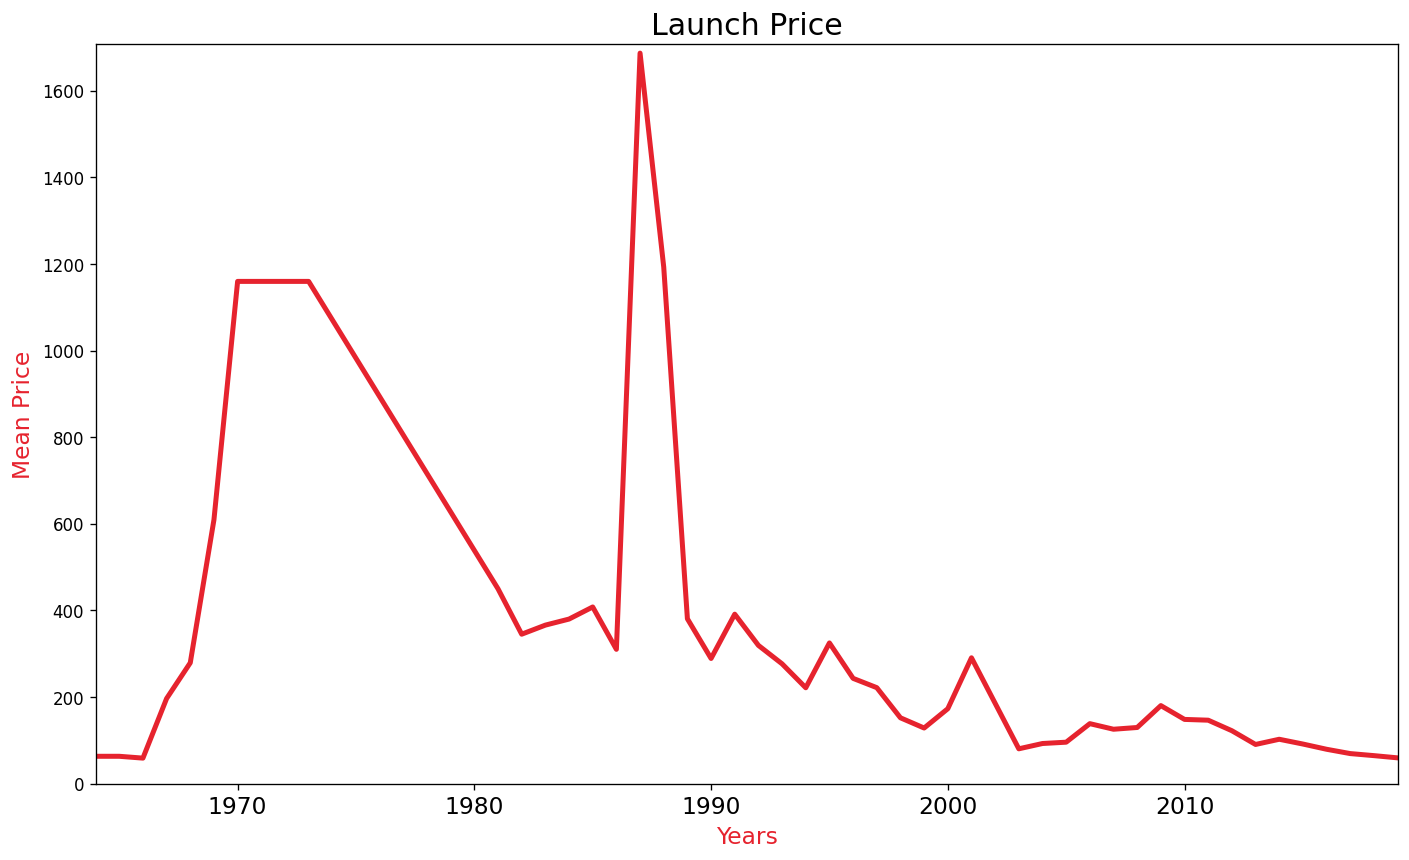

In [49]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Launch Price', fontsize=18)

plt.xticks(fontsize=14)

ax1 = plt.gca()

ax1.set_ylabel('Mean Price', color='#E6232E', fontsize=14)
ax1.set_xlabel('Years', color='#E6232E', fontsize=14)

ax1.set_ylim([0, df.dropna().groupby('Year')['Price'].mean().max()+20])
ax1.set_xlim([df.dropna().groupby('Year')['Price'].mean().index[:-1].min(), df.dropna().groupby('Year')['Price'].mean().index[:-1].max()])

ax1.plot(df.dropna().groupby('Year')['Price'].mean().index[:-1] , df.dropna().groupby('Year')['Price'].mean()[:-1], color='#E6232E', linewidth=3)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [50]:
df.groupby('Organisation')['Date'].count().sort_values(ascending=False)[:10]

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Date, dtype: int64

In [51]:
df.groupby(['Year','Organisation'])['Date'].count()


Year  Organisation
1957  RVSN USSR        2
      US Navy          1
1958  AMBA             7
      NASA             2
      RVSN USSR        5
                      ..
2020  Roscosmos        4
      SpaceX          14
      ULA              4
      VKS RF           3
      Virgin Orbit     1
Name: Date, Length: 663, dtype: int64

In [52]:
top_10_organisations = df['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist()
launches_by_top_10 = df[df['Organisation'].isin(top_10_organisations)].groupby(['Year','Organisation'])['Detail'].count().unstack(level=1)
launches_by_top_10.fillna(0, inplace=True)
launches_by_top_10

Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Year,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
1958,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00
1959,0.00,0.00,0.00,1.00,0.00,1.00,4.00,0.00,10.00,0.00
1960,0.00,0.00,0.00,5.00,0.00,4.00,9.00,0.00,21.00,0.00
1961,0.00,0.00,0.00,8.00,0.00,12.00,9.00,0.00,23.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2016,11.00,0.00,22.00,0.00,0.00,0.00,0.00,12.00,0.00,4.00
2017,11.00,0.00,16.00,0.00,0.00,0.00,0.00,8.00,0.00,6.00
2018,11.00,0.00,37.00,0.00,0.00,0.00,0.00,8.00,0.00,5.00


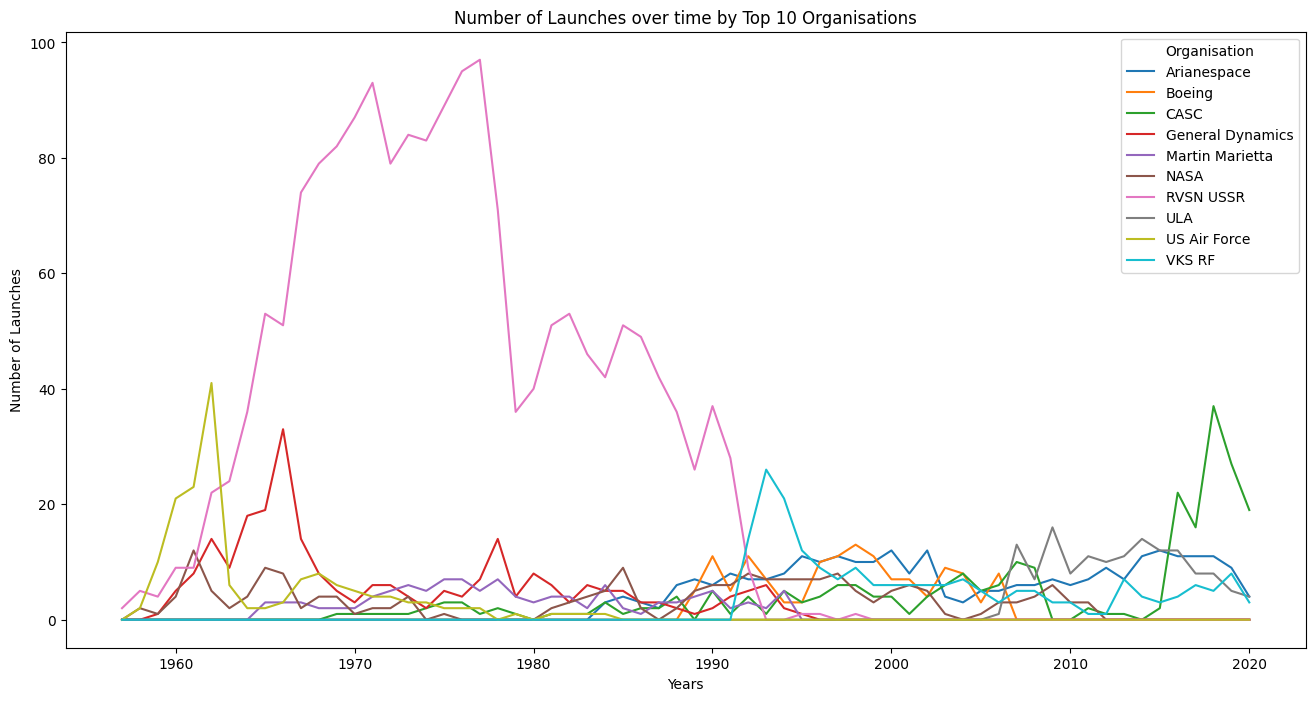

In [53]:
launches_by_top_10.plot(
    figsize=(16,8),
    title = 'Number of Launches over time by Top 10 Organisations',
)

plt.ylabel('Number of Launches')
plt.xlabel('Years')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [54]:
df_cold_war = df[df['Year']<=1991].sort_values('Year').reset_index(drop=True)
df_cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Countries,Month
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,1957,KAZ,10
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,KAZ,11
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,USA,12
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,USA,2
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,1958,USA,12
...,...,...,...,...,...,...,...,...,...,...
2602,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05 13:24:00+00:00,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,1991,USA,6
2603,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11 05:42:00+00:00,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,NaN,Success,1991,RUS,6
2604,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-13 15:41:00+00:00,Tsyklon-3 | Cosmos 2151,StatusRetired,NaN,Success,1991,RUS,6
2605,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-06-25 13:20:00+00:00,Cosmos-3M (11K65M) | Ta??foun n†­59,StatusRetired,NaN,Failure,1991,RUS,6


In [55]:
# Since Kazakhstan was part of the USSR, we replace Kazakhstan with Russian Federation
df_cold_war['Countries'].replace(
    {'KAZ':'RUS'},
    inplace=True
)
df_cold_war['Countries'].value_counts()

Countries
RUS    1770
USA     662
FRA      61
JPN      52
CHN      38
KEN       9
IND       7
AUS       6
ISR       2
Name: count, dtype: int64

In [56]:
df_cold_war = df_cold_war[df_cold_war['Countries'].isin(['RUS','USA'])].reset_index(drop=True)
df_cold_war


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Countries,Month
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,1957,RUS,10
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,RUS,11
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,USA,12
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,USA,2
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,1958,USA,12
...,...,...,...,...,...,...,...,...,...,...
2427,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-04 09:00:00+00:00,Tsyklon-3 | Okean 3,StatusRetired,NaN,Success,1991,RUS,6
2428,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05 13:24:00+00:00,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,1991,USA,6
2429,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11 05:42:00+00:00,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,NaN,Success,1991,RUS,6
2430,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-13 15:41:00+00:00,Tsyklon-3 | Cosmos 2151,StatusRetired,NaN,Success,1991,RUS,6


In [57]:
df_cold_war[df_cold_war['Countries'] == 'RUS'].groupby('Year')['Organisation'].count()

Year
1957     2
1958     5
1959     4
1960     9
1961     9
1962    22
1963    24
1964    36
1965    53
1966    51
1967    75
1968    80
1969    83
1970    88
1971    93
1972    79
1973    84
1974    83
1975    89
1976    95
1977    97
1978    71
1979    36
1980    40
1981    51
1982    53
1983    46
1984    42
1985    51
1986    49
1987    42
1988    36
1989    26
1990    37
1991    29
Name: Organisation, dtype: int64

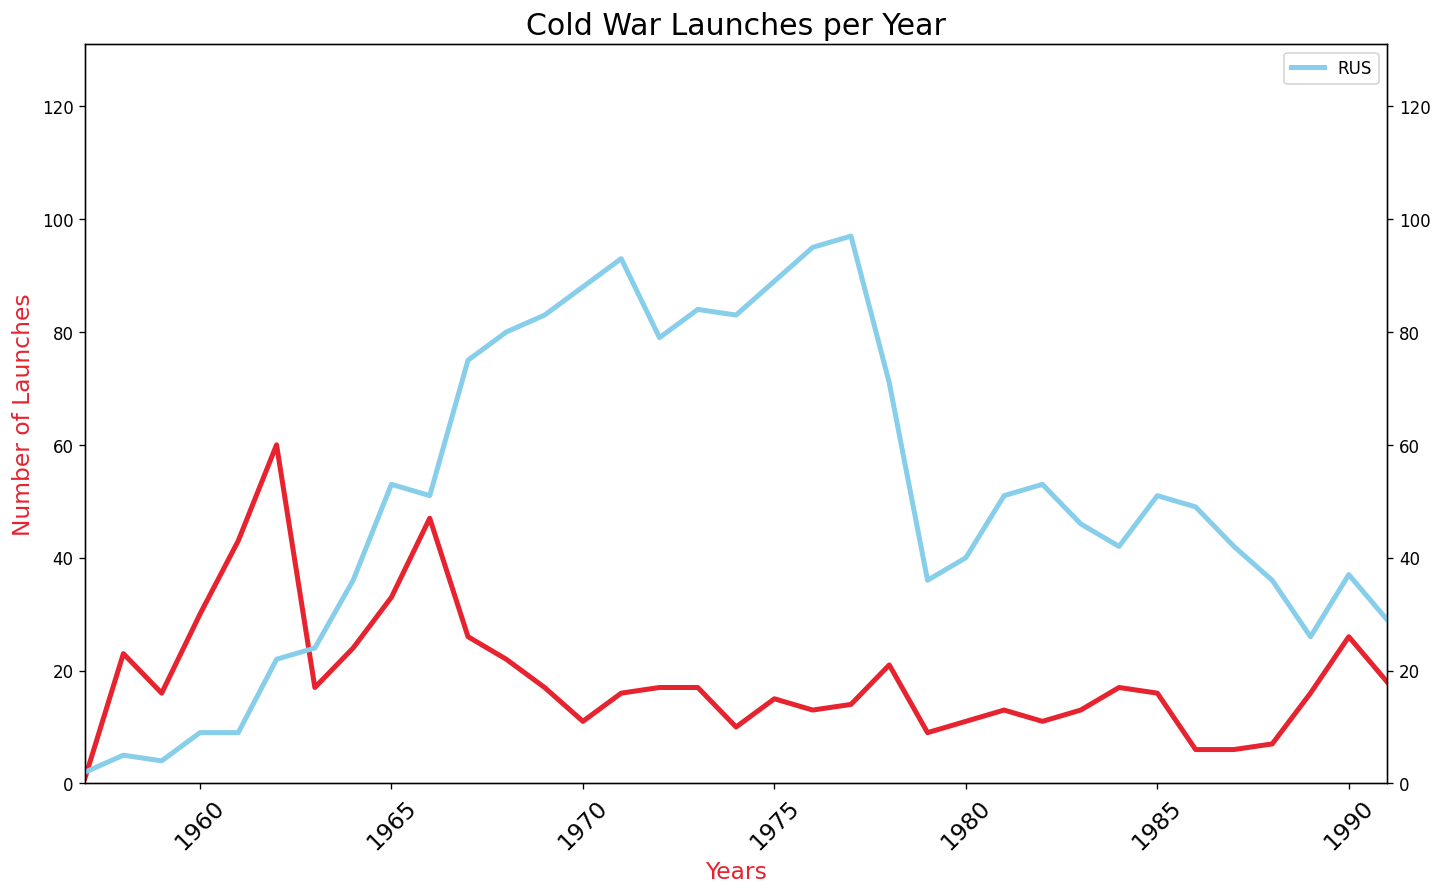

In [58]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Cold War Launches per Year', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Number of Launches', color='#E6232E', fontsize=14)
ax1.set_xlabel('Years', color='#E6232E', fontsize=14)

ax1.set_ylim([0, df_cold_war.groupby('Year')['Organisation'].count().max()+20])
ax1.set_xlim([df_cold_war['Year'].min(), df_cold_war['Year'].max()])
ax2.set_ylim([0, df_cold_war.groupby('Year')['Organisation'].count().max()+20])
ax2.set_xlim([df_cold_war['Year'].min(), df_cold_war['Year'].max()])

ax1.plot(df_cold_war['Year'].unique(), df_cold_war[df_cold_war['Countries'] == 'USA'].groupby('Year')['Organisation'].count(), color='#E6232E', linewidth=3)
ax2.plot(df_cold_war['Year'].unique(), df_cold_war[df_cold_war['Countries'] == 'RUS'].groupby('Year')['Organisation'].count(), color='skyblue', linewidth=3)

plt.legend(labels=df_cold_war['Countries'])

plt.show()

We can assume that the USSR had more launches than USA.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [59]:
bar = px.bar(x = df_cold_war['Countries'].unique(), # index = category name
             y = df_cold_war['Countries'].value_counts(), # count
             title='Number of Launches (USSR vs USA)',
             color_continuous_scale='Agsunset')

bar.update_layout(xaxis_title='USSR vs USA',
yaxis_title='Number of Launches',
coloraxis_showscale=False,
width=600,
height=400)

bar.show()

Now we can confirm that the USSR had more launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [60]:
cold_war = df_cold_war.groupby(by=['Year','Countries'])['Mission_Status'].count().unstack(level=1)
cold_war['RUS'].cumsum()

Year
1957       2
1958       7
1959      11
1960      20
1961      29
1962      51
1963      75
1964     111
1965     164
1966     215
1967     290
1968     370
1969     453
1970     541
1971     634
1972     713
1973     797
1974     880
1975     969
1976    1064
1977    1161
1978    1232
1979    1268
1980    1308
1981    1359
1982    1412
1983    1458
1984    1500
1985    1551
1986    1600
1987    1642
1988    1678
1989    1704
1990    1741
1991    1770
Name: RUS, dtype: int64

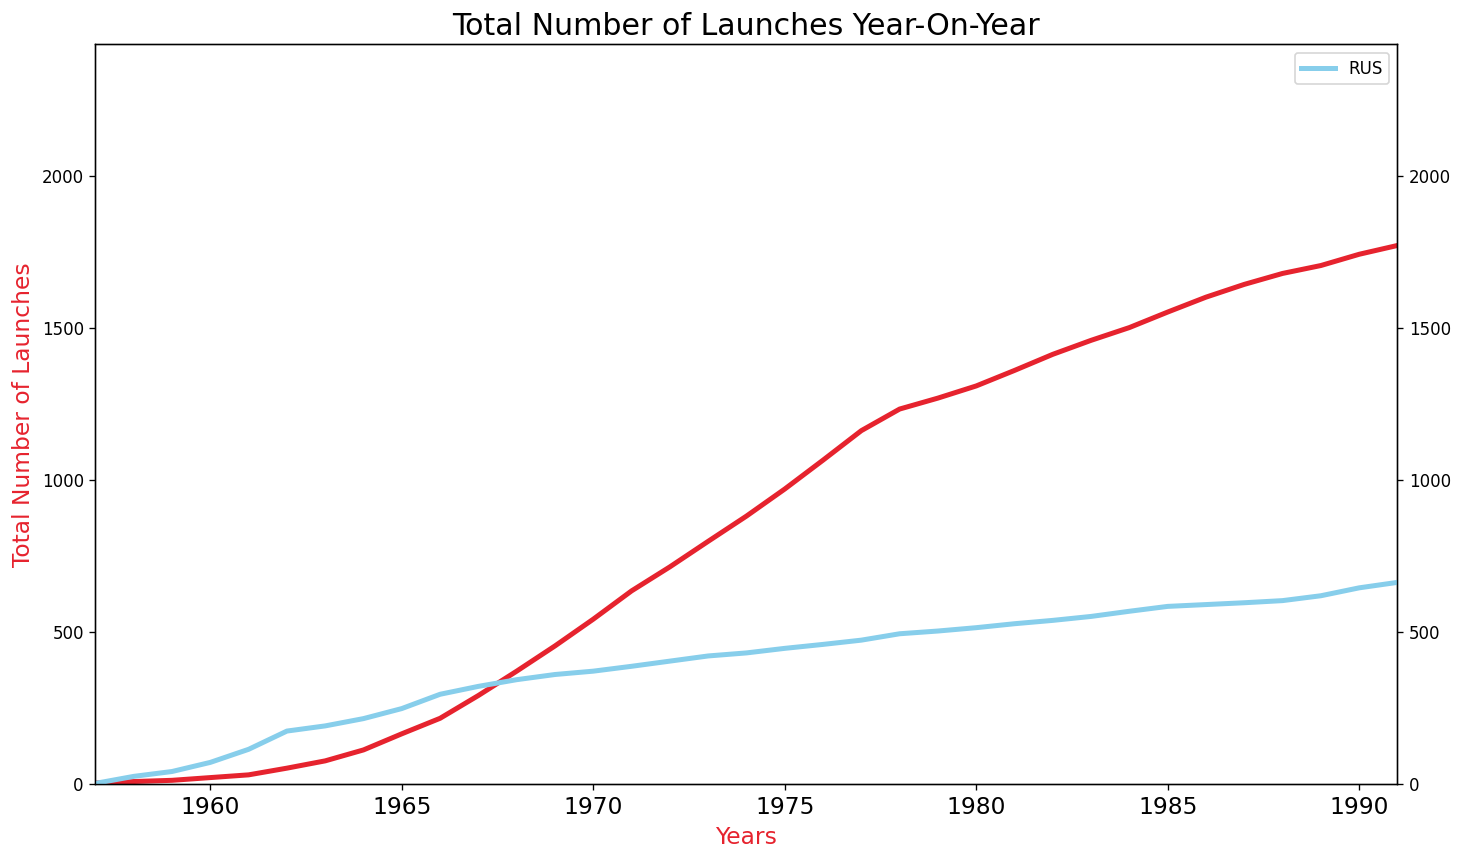

In [61]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Total Number of Launches Year-On-Year', fontsize=18)

plt.xticks(fontsize=14,)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Total Number of Launches', color='#E6232E', fontsize=14)
ax1.set_xlabel('Years', color='#E6232E', fontsize=14)

ax1.set_ylim([0, df_cold_war.index.max()])
ax1.set_xlim([df_cold_war['Year'].min(), df_cold_war['Year'].max()])
ax2.set_ylim([0, df_cold_war.index.max()])
ax2.set_xlim([df_cold_war['Year'].min(), df_cold_war['Year'].max()])

ax1.plot(df_cold_war['Year'].unique(), cold_war['RUS'].cumsum(), color='#E6232E', linewidth=3)
ax2.plot(df_cold_war['Year'].unique(), cold_war['USA'].cumsum(), color='skyblue', linewidth=3)

plt.legend(labels=df_cold_war['Countries'])

plt.show()


## Chart the Total Number of Mission Failures Year on Year.

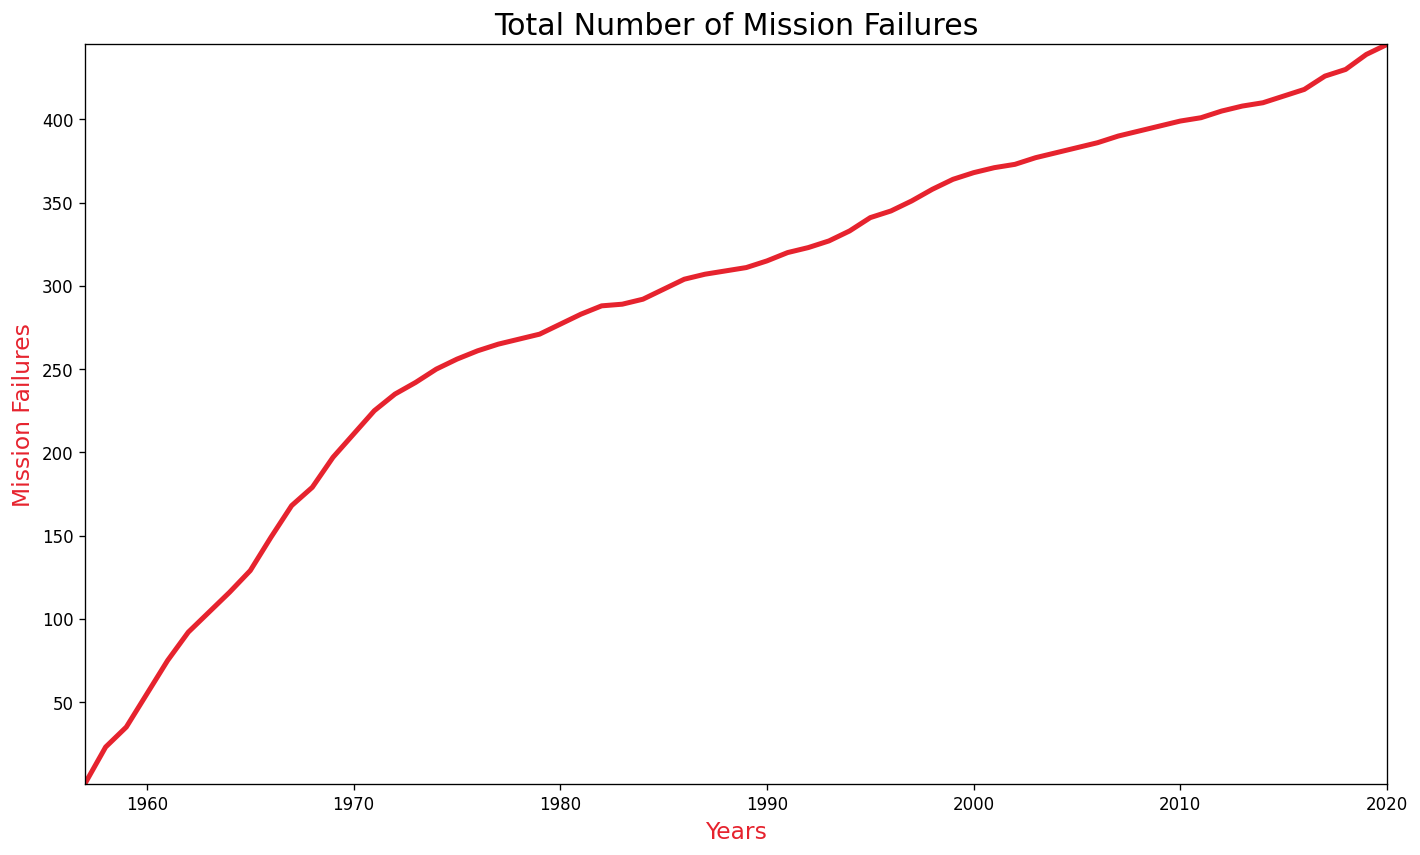

In [62]:
total_failure = df[df['Mission_Status'] != 'Success'].groupby('Year')['Mission_Status'].count().cumsum()

plt.figure(figsize=(14,8), dpi=120)
plt.title('Total Number of Mission Failures', fontsize=18)

ax1 = plt.gca()

ax1.set_ylabel('Mission Failures', color='#E6232E', fontsize=14)
ax1.set_xlabel('Years', color='#E6232E', fontsize=14)

ax1.set_ylim([total_failure.min(), total_failure.max()])
ax1.set_xlim([total_failure.index.min(), total_failure.index.max()])

ax1.plot(total_failure.index, total_failure, color='#E6232E', linewidth=3)

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [63]:
failures_per_year = df[df['Mission_Status'] != 'Success'].groupby('Year')['Mission_Status'].count()
failures_per_year
launches_per_year = df.groupby('Year')['Mission_Status'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Mission_Status, Length: 64, dtype: int64

In [64]:
launches_per_year = df.groupby('Year')['Mission_Status'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Mission_Status, Length: 64, dtype: int64

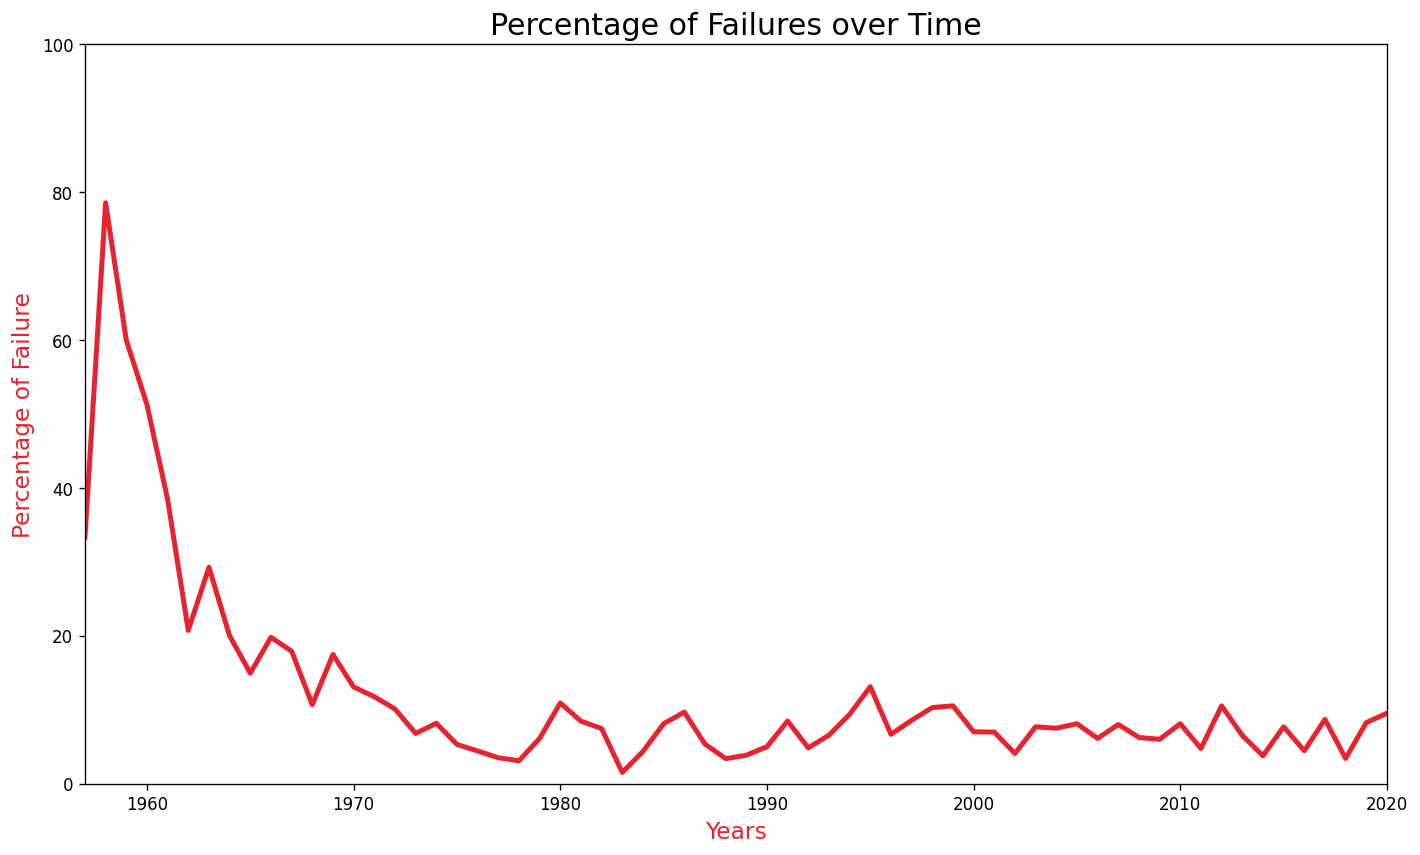

In [65]:
pct = failures_per_year/launches_per_year * 100

plt.figure(figsize=(14,8), dpi=120) 
plt.title('Percentage of Failures over Time', fontsize=18)

ax1 = plt.gca()

ax1.set_ylabel('Percentage of Failure', color='#E6232E', fontsize=14)
ax1.set_xlabel('Years', color='#E6232E', fontsize=14)

ax1.set_ylim([0, 100])
ax1.set_xlim([pct.index.min(), pct.index.max()])

ax1.plot(pct.index, pct, color='#E6232E', linewidth=3)

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [66]:
launches_by_country_per_year = df.groupby(['Year', 'Countries'])['Mission_Status'].count().unstack(level=1)
launches_by_country_per_year.fillna(0, inplace=True)
launches_by_country_per_year

Countries,AUS,BRA,CHN,FRA,IND,IRN,ISR,JPN,KAZ,KEN,KIR,KOR,NZL,PRK,RUS,USA
Year,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1958,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,22.00,11.00,7.00,0.00,1.00,4.00,11.00,0.00,0.00,0.00,0.00,1.00,6.00,27.00
2017,0.00,0.00,18.00,11.00,5.00,1.00,0.00,7.00,13.00,0.00,0.00,0.00,1.00,0.00,6.00,30.00
2018,0.00,0.00,39.00,11.00,7.00,0.00,0.00,6.00,9.00,0.00,0.00,0.00,3.00,0.00,8.00,34.00


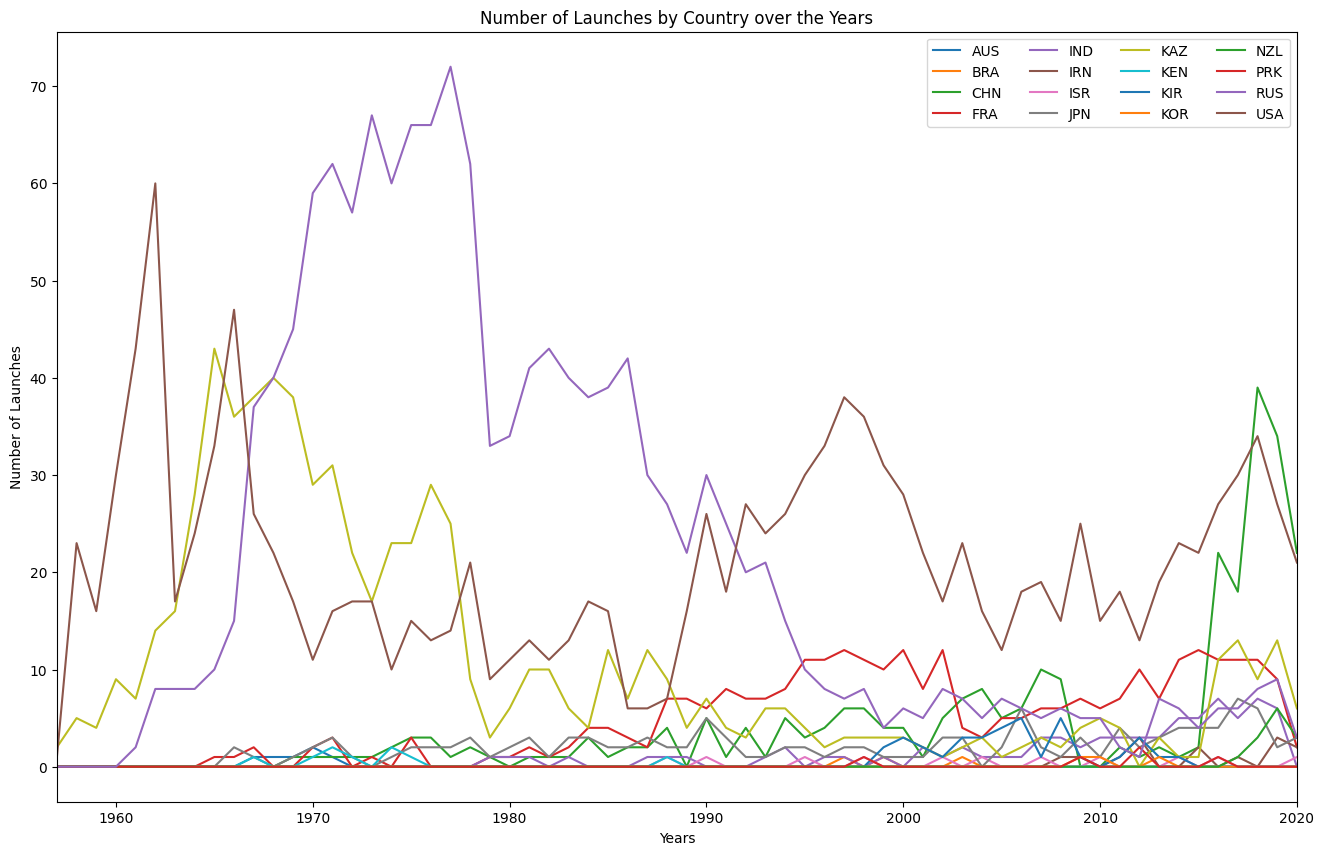

In [67]:
launches_by_country_per_year.plot(
    title = 'Number of Launches by Country over the Years',
    figsize = (16,10),
)

plt.ylabel('Number of Launches')
plt.xlabel('Years')
plt.xlim(1957, 2020)
plt.legend(loc="upper right", ncol=4)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [68]:
launches_by_organisation_per_year = df.groupby(['Year', 'Organisation'])['Mission_Status'].count().unstack(level=1)
launches_by_organisation_per_year.fillna(0, inplace=True)
launches_by_organisation_per_year

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
Year,,,,,,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1958,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,10.00,4.00,0.00,0.00,0.00,0.00,0.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,0.00,11.00,0.00,4.00,0.00,22.00,0.00,0.00,...,9.00,0.00,12.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00
2017,0.00,0.00,0.00,11.00,0.00,1.00,0.00,16.00,1.00,0.00,...,18.00,0.00,8.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00
2018,0.00,0.00,0.00,11.00,0.00,2.00,0.00,37.00,0.00,0.00,...,21.00,0.00,8.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00


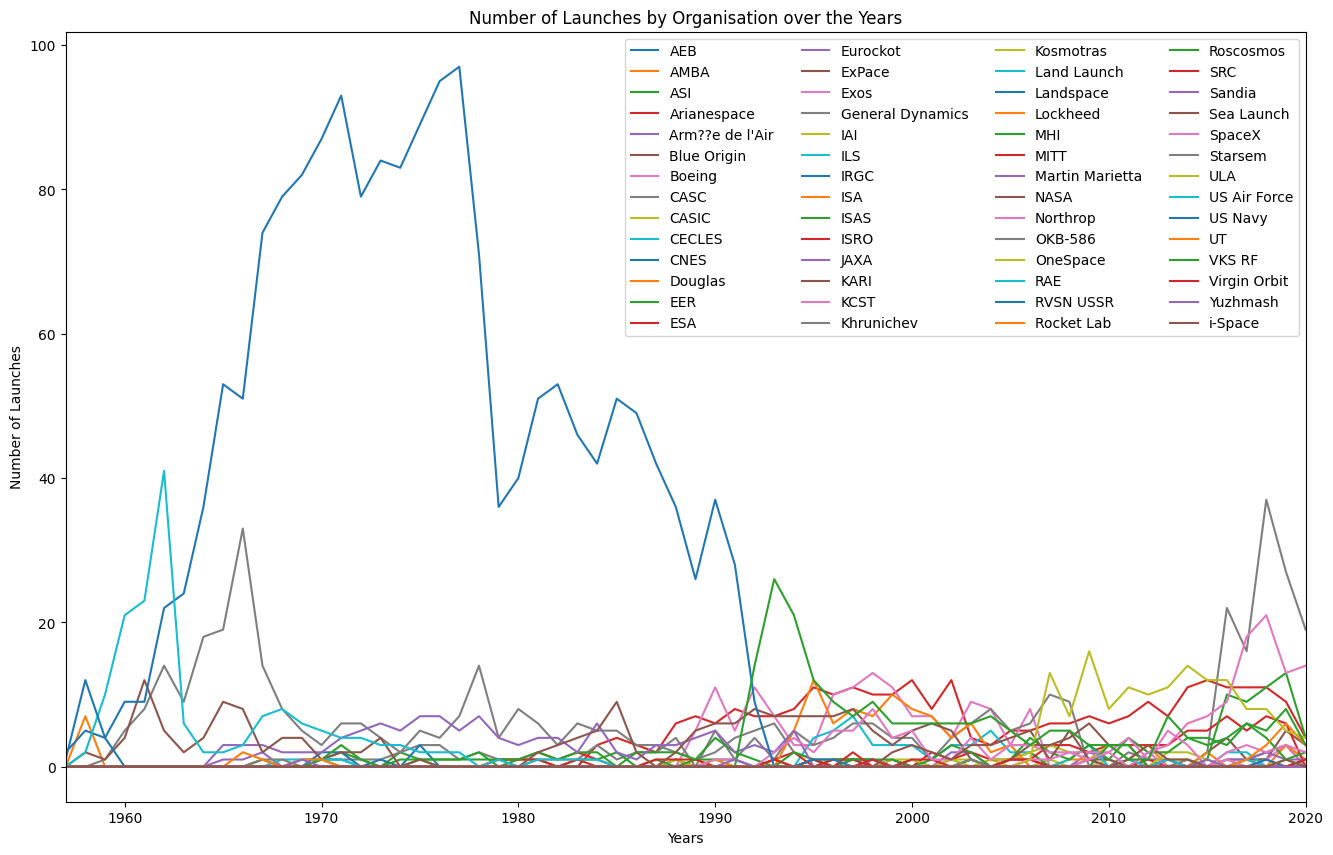

In [69]:
launches_by_organisation_per_year.plot(
    title = 'Number of Launches by Organisation over the Years',
    figsize = (16,10),
)

plt.ylabel('Number of Launches')
plt.xlabel('Years')
plt.xlim(1957, 2020)
plt.legend(loc="upper right", ncol=4)
plt.show()